In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


O banco de dados é composto por 7 colunas das quais 3 são categóricas e 4 são numéricas. A variável target neste dataset é 'charges' queé o valor pago pelas seguradoras. 


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Não existe nenhum valor discrepante nas colunas, então podemos partir tranquilos para EDA.

In [10]:
sns.set_theme()

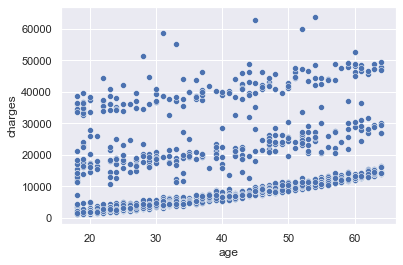

In [20]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data = df, x = 'age', y ='charges')
plt.show()

Vê-se uma tendência de aumento nos valores pagos com o aumento da idade

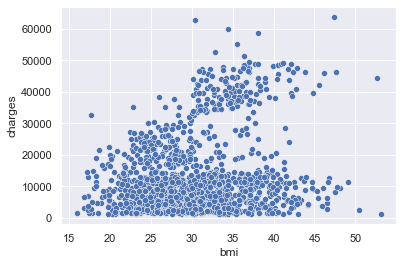

In [21]:
fig, ax = plt.subplots()
ax = sns.scatterplot(data = df, x = 'bmi', y ='charges')
plt.show()

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [42]:
enc = OneHotEncoder(drop='first')
enc_df = pd.DataFrame(enc.fit_transform(df[['sex']]).toarray())
df =df.join(enc_df)
df.head()

,age,sex,bmi,children,smoker,region,charges,0
0,19,female,27.900,0,yes,southwest,16884.92400,0.0
1,18,male,33.770,1,no,southeast,1725.55230,1.0
2,28,male,33.000,3,no,southeast,4449.46200,1.0
3,33,male,22.705,0,no,northwest,21984.47061,1.0
4,32,male,28.880,0,no,northwest,3866.85520,1.0


In [43]:
df.drop('sex',axis =1, inplace = True)

In [49]:
df.rename(columns = {0: 'sex'},inplace = True)

In [52]:
#análise da região, novamente com one hot encoder
enc = OneHotEncoder(drop='first')
enc_df = pd.DataFrame(enc.fit_transform(df[['region']]).toarray())
df =df.join(enc_df)
df.head()

,age,bmi,children,smoker,region,charges,sex,0,1,2
0,19,27.900,0,yes,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,33.770,1,no,southeast,1725.55230,1.0,0.0,1.0,0.0
2,28,33.000,3,no,southeast,4449.46200,1.0,0.0,1.0,0.0
3,33,22.705,0,no,northwest,21984.47061,1.0,1.0,0.0,0.0
4,32,28.880,0,no,northwest,3866.85520,1.0,1.0,0.0,0.0


In [54]:
df.drop([0,1,2],axis =1, inplace = True)

In [76]:
#análise da região, novamente com one hot encoder
enc = OneHotEncoder(drop='first')
enc_df = pd.DataFrame(enc.fit_transform(df[['smoker']]).toarray())
df =df.join(enc_df)
df.head()

,age,bmi,children,smoker,region,sex,charges,0
0,19,27.900,0,yes,southwest,0.0,16884.92400,1.0
1,18,33.770,1,no,southeast,1.0,1725.55230,0.0
2,28,33.000,3,no,southeast,1.0,4449.46200,0.0
3,33,22.705,0,no,northwest,1.0,21984.47061,0.0
4,32,28.880,0,no,northwest,1.0,3866.85520,0.0


In [77]:
df.drop('smoker',axis =1, inplace = True)
df.rename(columns = {0: 'smoker'},inplace = True)
df = df[['age', 'bmi', 'children', 'smoker', 'region','sex' ,'charges']]

<AxesSubplot:>

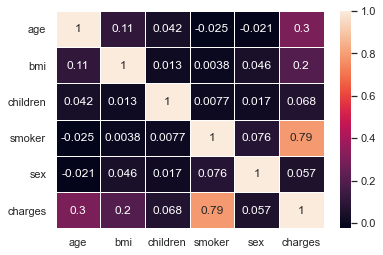

In [78]:
sns.heatmap(df.corr(),annot= True,linewidths=.5)

Podemos ver que as variáveis não possuem um alto grau de correlação, com exceção de ser ou não fumante que apresenta uma correlação forte com os valores pagos. Inclusive em relação ao sexo. Façamos então uma regressão linear simples com apenas a variável fumante e uma regressão Lasso.

In [81]:
X = df[['smoker']]
y = df[['charges']]
#separação treino / teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)

from sklearn.metrics import r2_score
print(f'o valor R2 do modelo é: {r2_score(y_test,y_pred)}')

o valor R2 do modelo é: 0.6490128691755094


O valor de r2 foi bom , porém vamos adicionar outras variáveis ao modelo para tentar deixá-lo um pouco mais robusto. A próxima variável será idade.

In [84]:
X = df[['smoker','age']]
y = df[['charges']]
#separação treino / teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

reg2 = LinearRegression()
reg2.fit(X_train,y_train)
y_pred = reg2.predict(X_test)

print(f'o valor R2 do modelo é: {r2_score(y_test,y_pred)}')

o valor R2 do modelo é: 0.7412271370215588


Já pode-se notar uma melhora significativa no r2 do modelo. Próximo passo é fazer uma regressão Lasso, pois veremos a real importância das variáveis.

In [88]:
X = df.drop(['charges','region'],axis =1)
y = df[['charges']]

#separação treino / teste
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

las = Lasso()
las.fit(X_train,y_train)
y_pred = las.predict(X_test)

print(f'o valor R2 do modelo é: {r2_score(y_test,y_pred)}')

o valor R2 do modelo é: 0.7680903791435085
